<a href="https://colab.research.google.com/github/Thandiwe-Khalaki/load-shortfall-regression-predict-api/blob/master/G15_Drikus_Lin_Regression_Model_Starter_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Group_15 Drikus de Wet**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [ ]:
# Libraries for data loading, data manipulation and data visulisation
%matplotlib inline
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
import matplotlib.dates as dates

# Libraries for data preparation and model building
from sklearn import linear_model


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [ ]:
df_train = pd.read_csv('./df_train.csv', parse_dates=['time'],infer_datetime_format=True)
df_test = pd.read_csv('./df_test.csv', parse_dates=['time'],infer_datetime_format=True)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [ ]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

We have weather data for five cities of Spain: **Madrid, Valencia, Seville, Bilbao, Barcelona**

The weather categories in the dataset include:
<br> - **wind_speed** and **wind_degree** Valencia wind degree is categorical 1-10 and other cities are between 1-360 degrees
<br> - **rain_1h** and **rain_3h**
<br> - **humidity**
<br> - **clouds_all**
<br> - **pressure**
<br> - **snow_3h**
<br> - **weather_id**: A metric used to explain the weather condition of a specific city at a specified time
<br> - **temp_max** and **temp**

Our target variable is **load_shortfall_3h**: The difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

All of the variables are numeric (float64) except for 
<br> 1) Time - imported in datetime64[ns] fromat from CSV
<br> 2) Valencia_wind_deg and Seville_pressure, which are objects (categorical data).

This command also shows us that out of the 8763 rows in our data set per feature only one of the features contain null values (missing data): Valencia_pressure.

## Merging dataset to simplify work

In [ ]:
df=pd.concat([df_train, df_test])
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
df.shape

(11683, 49)

Our dataset is now bigger - all the data is together 

In [ ]:
df.tail(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


**load_shortfall_3h** has NaN values at the end as expected since the test data do not have values for the predictor variable 

In [ ]:
#df.isnull().sum()

C:\Users\Drikus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_pressure'>

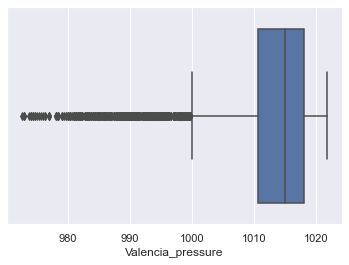

In [ ]:
# print a box plot to see what the data looks like in the valencia|_pressure column 
sns.boxplot(df['Valencia_pressure'])

In [ ]:
# look at the median, mode and mean value of valencia_pressure to figure out if it would be a good idea to impute the values 
print('Mode')
print(df['Valencia_pressure'].mode())
print('Mean')
print(df['Valencia_pressure'].mean())
print('Median')
print(df['Valencia_pressure'].median())

Mode
0    1018.0
dtype: float64
Mean
1012.3466870428985
Median
1015.0


Turns out the median, mode and mean values of this column are all pretty similar so we impute the column

In [ ]:
#make a copy of the dataset before we make anyt changes to it  
df_clean = df
# *Impute Valencia_pressure column with the mode 
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [ ]:
# Check to see there is no more missing data from Valencia_pressure
print("Percentage of data missing from Valencia_pressure = " 
      + str(round(df_clean['Valencia_pressure'].isnull().sum() * 100 / len(df_clean),2)), ' %')

Percentage of data missing from Valencia_pressure = 0.0  %


### Time - making features of 

We still can't work with this but here is an article on how you can use it


https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/

### Dealing with the Object data types 

Pre-processing step: Change the Valencia_wind_deg and Seville_pressure categorical feautures to numerical 

In [ ]:

# First strip out the categorical text 

df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].map(lambda x: x.lstrip('level_'))
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].map(lambda x: x.lstrip('sp'))

# Then change datatype from object to int "Valencia_wind_deg", "Seville_pressure"

df_clean[["Valencia_wind_deg", "Seville_pressure"]] = df_clean[["Valencia_wind_deg", "Seville_pressure"]].apply(pd.to_numeric)

print(df_clean['Valencia_wind_deg'].dtypes)
print(df_clean['Seville_pressure'].dtypes)

int64
int64


### Dropping noise

Unnamed comun is the same as the index - drop it 

In [ ]:
df_clean = df_clean.drop(['Unnamed: 0', 'time'], axis = 1)

In [ ]:
df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


### 3.1  Look at data statistics


In [ ]:
#Print out column names to use in the EDA and preprocessing 
#df_clean.columns

In [ ]:
# df_clean.describe()

In [ ]:
# '''
# Note for Group_15
# Lets Look at the Wind direction descriptive stats all together ?

# Then temperature 
# then rain
# then pressure, etc 

# Because that would make sense to compare the range, min max, std, mean, etc - between cities

# '''

### Data Processing is complete

All our features are now numerical except for time

### 3.2 Plot relevant feature interactions

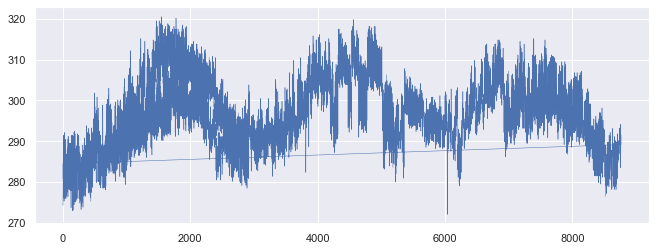

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
df_clean['Seville_temp_max'].plot(linewidth=0.5);


In [ ]:
#set temprtature
temp_max = df_clean[['Seville_temp_max','Bilbao_temp_max','Barcelona_temp_max','Valencia_temp_max','Madrid_temp_max']]
temp = df_clean[['Seville_temp','Bilbao_temp','Barcelona_temp','Valencia_temp','Madrid_temp']]
temp_min = df_clean[['Seville_temp_min','Bilbao_temp_min','Barcelona_temp_min','Valencia_temp_min','Madrid_temp_min']]


<AxesSubplot:>

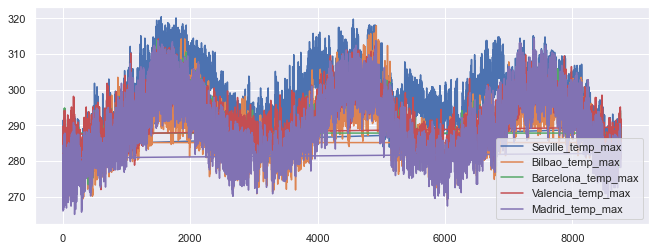

In [ ]:
temp_max.plot()

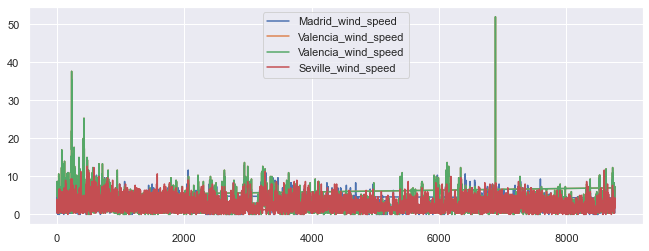

In [ ]:
viz = df_clean[['Madrid_wind_speed','Valencia_wind_speed','Valencia_wind_speed','Seville_wind_speed']]
viz.plot()
pyplot.show()

<AxesSubplot:xlabel='Valencia_wind_deg', ylabel='load_shortfall_3h'>

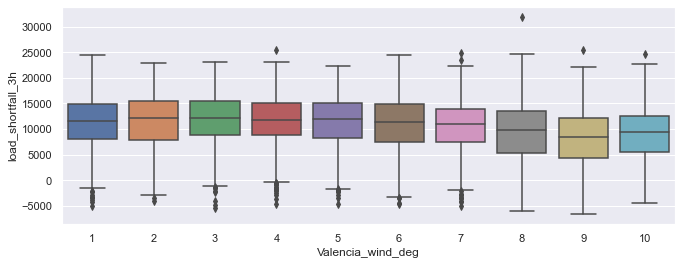

In [ ]:
sns.boxplot(x="Valencia_wind_deg", y="load_shortfall_3h", data=df_clean)

<AxesSubplot:xlabel='Seville_pressure', ylabel='load_shortfall_3h'>

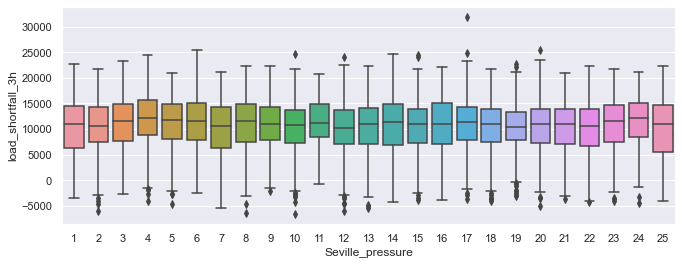

In [ ]:
sns.boxplot(x="Seville_pressure", y="load_shortfall_3h", data=df_clean)

## 3.3 Evaluate correlation

In [ ]:
# This EDA has to go before we drop time 

# #get year,month,week,days,hours from time column and convert them to int
# df_clean['year'] = pd.DatetimeIndex(df_clean['time']).year
# df_clean['month'] = pd.DatetimeIndex(df_clean['time']).month
# df_clean['week'] = pd.DatetimeIndex(df_clean['time']).week
# df_clean['weekdays'] = pd.DatetimeIndex(df_clean['time']).weekday
# df_clean['hour'] = pd.DatetimeIndex(df_clean['time']).hour

# #change the datatype to float, useful for regression
# df_clean['year']= df_clean['year'].astype('float')
# df_clean['month']= df_clean['month'].astype('float')
# df_clean['week']= df_clean['week'].astype('float')
# df_clean['weekdays']= df_clean['weekdays'].astype('float')
# df_clean['hour']= df_clean['hour'].astype('float')

# df_clean[['year','month','week','weekdays','hour']].head()

In [ ]:
# #corelation between time and load_shortfall
# Time = df_train[['year','month','week','weekdays','hour','time','load_shortfall_3h']].corr()
# Time

In [ ]:
# sns.heatmap(Time.corr(), annot=True)

In [ ]:
# wind_speed = df_train[['Madrid_wind_speed','Valencia_wind_speed','Bilbao_wind_speed','Seville_wind_speed','Barcelona_wind_speed','load_shortfall_3h']].corr()
# wind_speed

In [ ]:
# sns.heatmap(wind_speed.corr(), annot= True)

In [ ]:
# #correlation between high temperature and load_shortfall
# temp_max = df_train[['Seville_temp_max','Bilbao_temp_max','Barcelona_temp_max','Valencia_temp_max','Madrid_temp_max','load_shortfall_3h']].corr()
# temp_max

In [ ]:
# sns.heatmap(temp_max.corr(), annot = True)

In [ ]:
# pressure = df_train[['Seville_pressure','Bilbao_pressure','Barcelona_pressure','Valencia_pressure','Madrid_pressure','load_shortfall_3h']].corr()
# pressure

In [ ]:
# sns.heatmap(pressure.corr(), annot= True)

In [ ]:
# temp = df_train[['Seville_temp','Bilbao_temp','Barcelona_temp','Valencia_temp','Madrid_temp','load_shortfall_3h']].corr()
# temp

In [ ]:
# sns.heatmap(temp.corr(), annot = True)

In [ ]:
#  pearson_coef, p_value = stats.pearsonr(df_train['hour'], df_train['load_shortfall_3h'])
# print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

## 3.4 Feature distributions

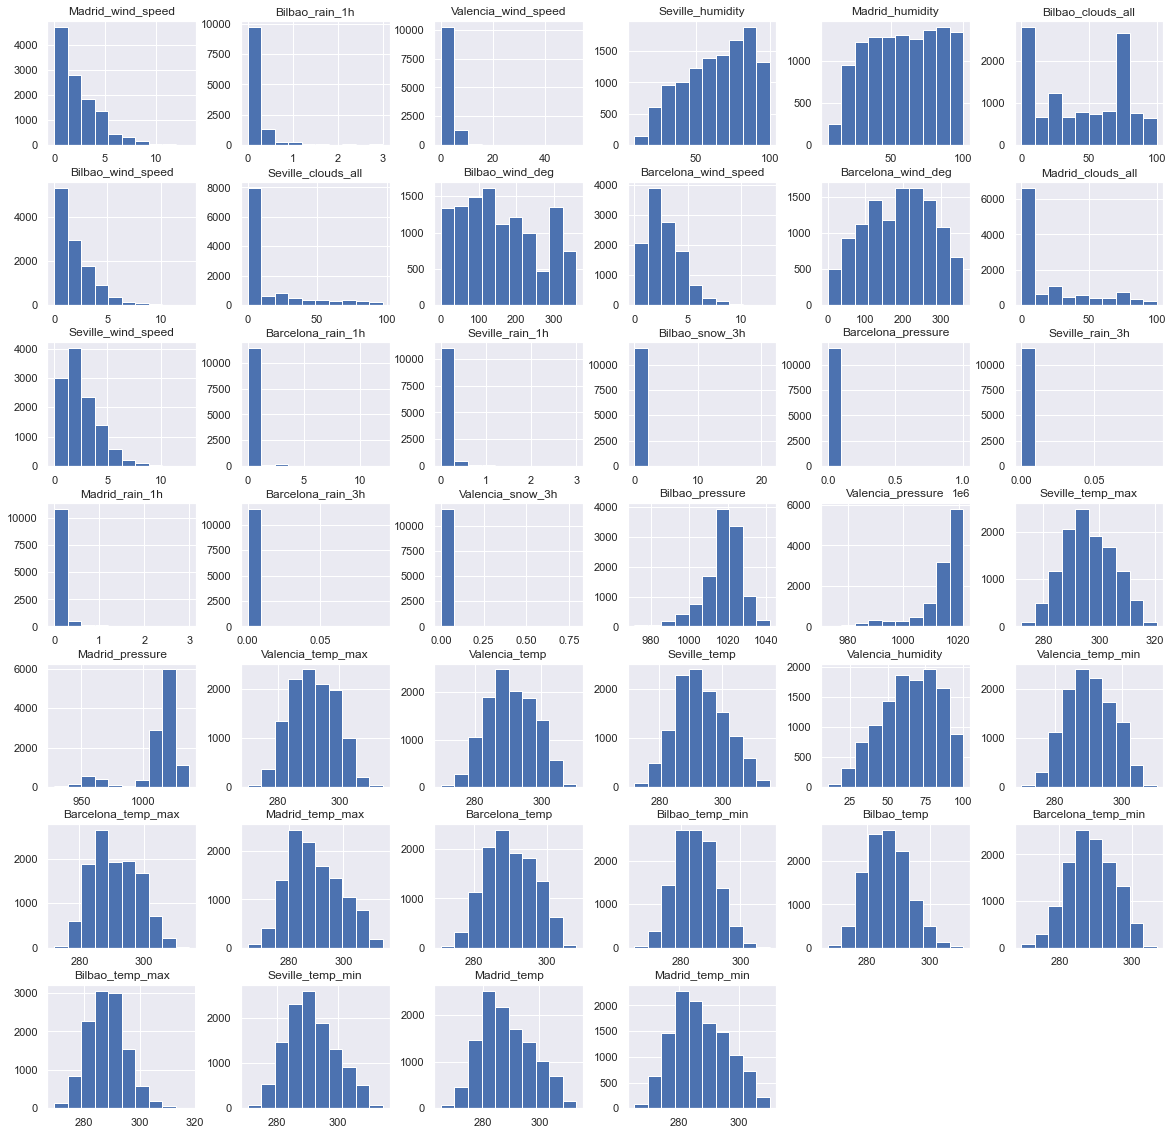

In [ ]:
 # create a list of all numerical features
features = ['Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_pressure',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min']
df_clean[features].hist(figsize=(20,20));

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# # remove missing values/ features - Done 

# df_train.info()

### create new features

### engineer existing features

### Standardisation 

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### Preperation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *

In [ ]:
y = df_clean[:len(df_train)][['load_shortfall_3h']]

x = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
# Ignore for now
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

In [ ]:
#x.head()

In [ ]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


## Load model

In [ ]:
lr = LinearRegression()

In [ ]:
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2) 

In [ ]:
lr.fit(x_train,y_train)

preds = lr.predict(x_test)

## Evaluate Model

In [ ]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
rmse(y_test, preds)

4846.321430190237

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, preds)

0.12780107208464053

## Making a submission

In [ ]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

In [ ]:
lr.fit(x_train,y)

preds = lr.predict(x_test)

In [ ]:
daf=pd.DataFrame(preds, columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,9722.354933
1,8795.992820
2,9902.349678
3,9773.179514
4,9509.260584


In [ ]:
output = pd.DataFrame({"time":df_test['time']})
submission = output.join(daf)        
submission.to_csv("submission.csv", index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic